# Para generar las imágenes del TFG


In [6]:
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.sparse import csr_matrix
import time
import os
import matplotlib.pyplot as plt
from matplotlib import colormaps
import sys
import random
import seaborn as sns

import sklearn
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.optim as optim

np.set_printoptions(threshold=sys.maxsize)


In [7]:
plt.rcParams.update({
    'text.usetex': False,  # NO usar LaTeX para el texto
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.75,
    'grid.linestyle': '--'
})

# Configuración de Seaborn
sns.set_context('paper')
sns.set_style('whitegrid')

# Funciones de activación

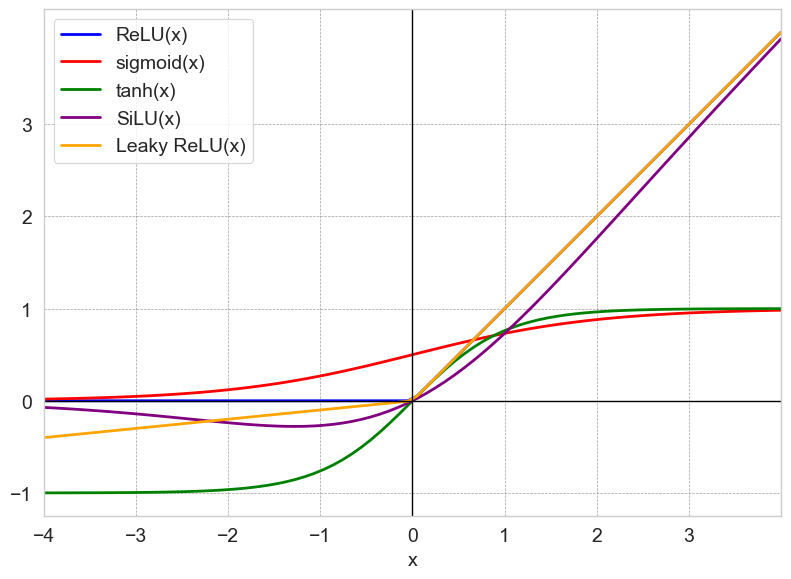

In [8]:
x = np.linspace(-4, 4, 80)

# Definir la función ReLU
def relu(x):
    return np.maximum(0, x)

# Definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Definir la función tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Definir la función SiLU
def silu(x):
    return x / (1 + np.exp(-x))

# Definir la función Leaky ReLU
def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# Calcular los valores de las funciones de activación
relu_vals = relu(x)
sigmoid_vals = sigmoid(x)
tanh_vals = tanh(x)
silu_vals = silu(x)
leaky_relu_vals = leaky_relu(x)

# Configuración de la figura
plt.figure(figsize=(8, 6))

# Graficar las funciones de activación
plt.plot(x, relu_vals, label='ReLU(x)', color='blue', linewidth=2)
plt.plot(x, sigmoid_vals, label='sigmoid(x)', color='red', linewidth=2)
plt.plot(x, tanh_vals, label='tanh(x)', color='green', linewidth=2)
plt.plot(x, silu_vals, label='SiLU(x)', color='purple', linewidth=2)
plt.plot(x, leaky_relu_vals, label='Leaky ReLU(x)', color='orange', linewidth=2)

# Etiquetas de los ejes
plt.xlabel("x", fontsize=14)
plt.legend(fontsize=14)

# Líneas de referencia en los ejes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Cuadrícula con aspecto cuadrado
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlim(-4, 4)

# Ticks
plt.xticks(np.arange(-4, 4, 1), fontsize=14)
plt.yticks(np.arange(-1, 4, 1), fontsize=14)

# Márgenes y guardado
plt.tight_layout()
plt.savefig("figures/activation_functions.pdf", format="pdf", dpi=300)
plt.show()